<a href="https://colab.research.google.com/github/DBIA2023/DecodingBiasesinAI_grp5/blob/main/Talenteria_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis**
##**Talenteria AI CV Ranking Scores Against Socio-Demographic Variables**

###**Datasets**:
1. All Variation (Ethnicity, Age, Gender, Origin)
2. Age Variation
3. Name Variation (Ethnictiy and Gender)
4. Uni Variation (Ethnicity/ Origin)
5. No Variation


###**Approach per Dataset**
1. Preparaing and cleaning data
2. Descriptive statistics + Checking assumptions
3. OLS Regression/ Difference in means








In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns


1. **Analysis of Dataset 1: All Variation**

> a) Preparation/ Cleaning


In [ ]:
df_all = pd.read_csv('/content/drive/MyDrive/Bias in AI - Groupwork/Coding/Data/All_Variation_Score.csv')
display(df_all.head())

,CV,Score,Name,Men,White,Latino,Asian,African,Age,Uni Global South,Uni Name
0,155,6.20,Aarav Singh,1,0,0,1,0,28,1,Universidad Nacional Autónoma de México (UNAM)...
1,156,5.87,Aarav Singh,1,0,0,1,0,52,0,"University of Wisconsin-Madison, United States"
2,268,5.87,Aarav Singh,1,0,0,1,0,30,0,"Freie Universitaet Berlin, Germany"
3,289,5.87,Aisha Ahmed,0,0,0,1,0,25,0,"University of St Andrews, United Kingdom"
4,28,6.20,Aisha Al-Mansoori,0,0,0,0,1,58,0,"Freie Universitaet Berlin, Germany"


In [ ]:
# N = 300
len(df_all)

300

In [ ]:
# no missing values
print(df_all.isnull().sum())

CV                  0
Score               0
Name                0
Men                 0
White               0
Latino              0
Asian               0
African             0
Age                 0
Uni Global South    0
Uni Name            0
dtype: int64


>b) Descriptive Statistics/ Making Sense of the Data

In [ ]:
df_all['Score'].describe()

count    298.000000
mean       5.888591
std        0.150655
min        5.330000
25%        5.870000
50%        5.870000
75%        5.870000
max        6.530000
Name: Score, dtype: float64

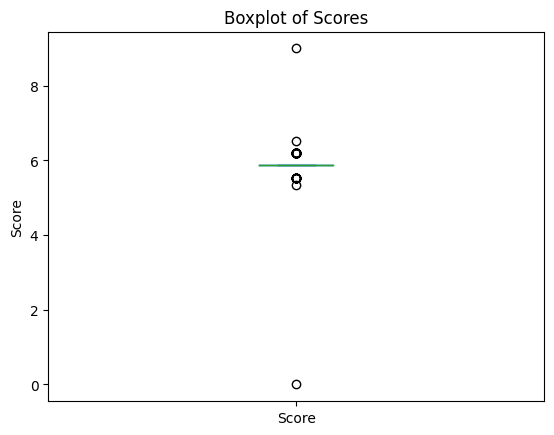

In [ ]:
# Boxplot: Distribution of scores
bx_score = df_all['Score'].plot.box()
plt.title('Boxplot of Scores')
plt.ylabel('Score')
plt.show()

In [ ]:
# One Value of 9 and one value of 0 > likely manual error thus getting rid of outliers
df_all = df_all[~((df_all['Score'] == 9) | (df_all['Score'] == 0))]

In [ ]:
score_all_counts = df_all['Score'].value_counts()
print(score_all_counts)

Score
5.87    241
6.20     36
5.53     19
5.33      1
6.53      1
Name: count, dtype: int64


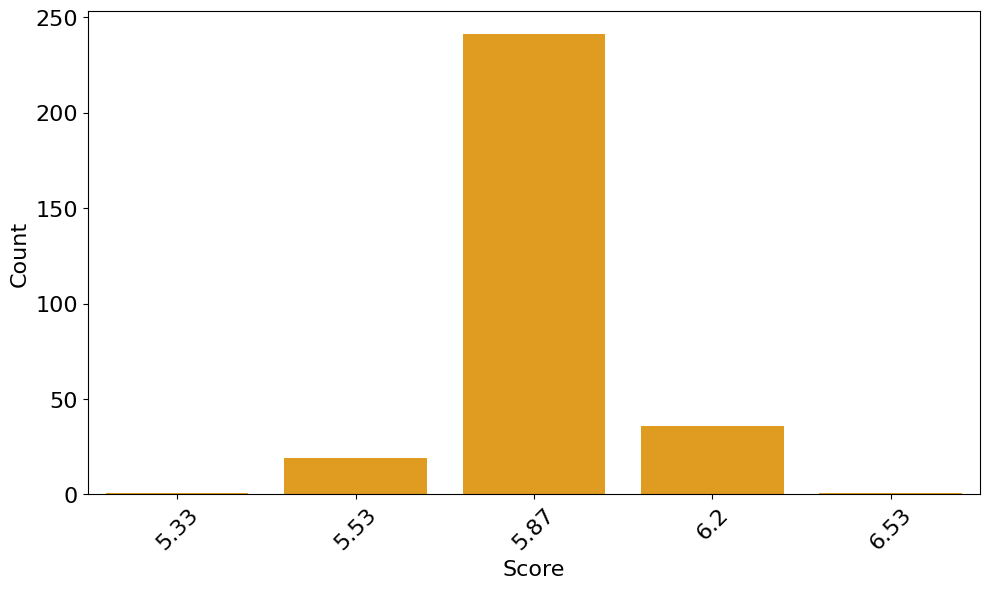

In [ ]:
# Bar plot for visualization of score distribution
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=score_all_counts.index, y=score_all_counts.values, color='orange')
plt.xlabel('Score', fontsize=16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(rotation=45, fontsize=16)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
#Testing Normality Assumption:
statistic, p_value = stats.shapiro(df_all['Score'])

alpha = 0.05
if p_value < alpha:
  print("Reject H0: Data not normally distribute")
else:
  print("Fail to reject H0: Data normally distributed")

# Scores are not normally distrbuted, potentially flawing the subsequent linear regression
# yet, the bar chart resembles a normal distribution, if only for 5 counts in total

Reject H0: Data not normally distribute


>c) Variation in Means per IV

In [ ]:
# Mean score (variation) per ethnicity (as proxied by name)
white = df_all[df_all["White"] ==1]
latino = df_all[df_all["Latino"] ==1]
asian = df_all[df_all["Asian"] ==1]
african = df_all[df_all["African"] ==1]

mean_score_white = white['Score'].mean()
mean_score_latino = latino['Score'].mean()
mean_score_asian = asian['Score'].mean()
mean_score_african = african['Score'].mean()

print('White: ', round(mean_score_white, 4))
print('Latino: ', round(mean_score_latino, 4))
print('Asian: ', round(mean_score_asian, 4))
print('African: ', round(mean_score_african, 4))

# some (marginal) difference

White:  5.8669
Latino:  5.8793
Asian:  5.8788
African:  5.9359


In [ ]:
# Mean (variation) per gender
men = df_all[df_all["Men"]==1]
women = df_all[df_all["Men"] == 0]

mean_score_men = men['Score'].mean()
mean_score_women = women['Score'].mean()

print('Men: ', round(mean_score_men, 4))
print('Women: ', round(mean_score_women, 4))

# hardly any difference

Men:  5.8807
Women:  5.897


In [ ]:
# Mean score (variation) given Global South [yes, no] as proxied by university

Global_South = df_all[df_all["Uni Global South"] ==1]
Global_North = df_all[df_all["Uni Global South"] ==0]


mean_score_south = Global_South['Score'].mean()
mean_score_north = Global_North['Score'].mean()

print('Global South: ', round(mean_score_south, 4))
print('Global North: ', round(mean_score_north, 4))

# very small difference: Global South again doing better

Global South:  5.8972
Global North:  5.8783


In [ ]:
# Mean score (variation) given Uni-Name

Global_South_dummies = pd.get_dummies(df_all['Uni Name'])

df_all = pd.concat([df_all, Global_South_dummies.astype(int)], axis=1)

Ger = df_all[df_all['Freie Universitaet Berlin, Germany']==1]
Kor = df_all[df_all['Pohang University of Science And Technology (POSTECH), South Korea']==1]
Chi = df_all[df_all['Pontificia Universidad Católica de Chile (UC), Chile']==1]
US1 = df_all[df_all['Purdue University, United States']==1]
US2 = df_all[df_all['University of Wisconsin-Madison, United States']==1]
Mex = df_all[df_all['Universidad Nacional Autónoma de México (UNAM), Mexico']==1]
Arg = df_all[df_all['Universidad de Buenos Aires (UBA), Argentina']==1]
UK = df_all[df_all['University of St Andrews, United Kingdom']==1]

Ger_mean = Ger['Score'].mean()
Kor_mean = Kor['Score'].mean()
Chi_mean = Chi['Score'].mean()
US1_mean = US1['Score'].mean()
US2_mean = US2['Score'].mean()
Mex_mean = Mex['Score'].mean()
Arg_mean = Arg['Score'].mean()
UK_mean = UK['Score'].mean()


print('Ger: ', Ger_mean)
print('Kor: ', Kor_mean)
print('Chi: ', Chi_mean)
print('US1: ', US1_mean)
print('US2: ', US2_mean)
print('Mex: ', Mex_mean)
print('Arg: ', Arg_mean)
print('UK: ', UK_mean)

# some difference?

Ger:  5.725250000000001
Kor:  5.879705882352942
Chi:  5.952500000000001
US1:  5.995172413793104
US2:  5.921250000000001
Mex:  5.873243243243244
Arg:  5.8770212765957455
UK:  5.917142857142858


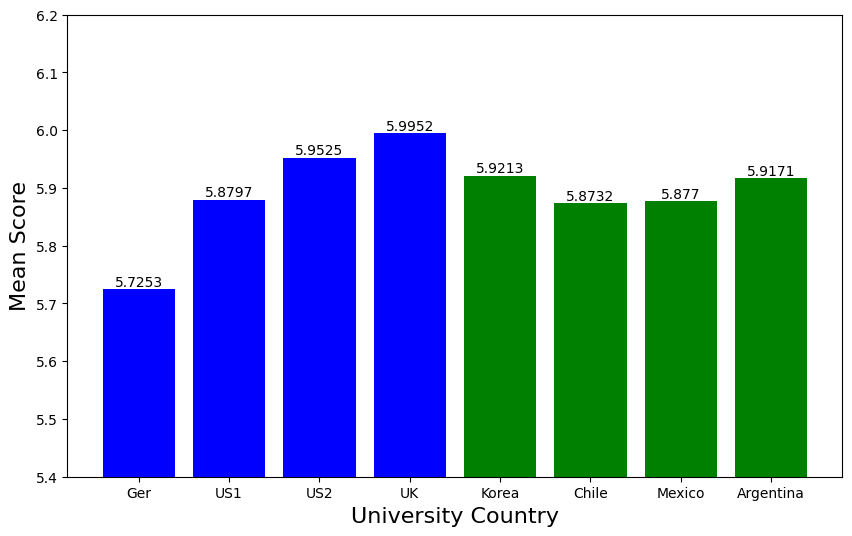

In [ ]:
# Plotting Variation in Means given Uni-Names
countries = ['Ger', 'US1', 'US2', 'UK', 'Korea', 'Chile', 'Mexico', 'Argentina']
means = [5.725250000000001, 5.879705882352942, 5.952500000000001, 5.995172413793104,
         5.921250000000001, 5.873243243243244, 5.8770212765957455, 5.917142857142858]


# Define colors for each country group
colors = ['blue' if country in ['Ger', 'US1', 'US2', 'UK'] else 'green' for country in countries]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(countries, means, color=colors)

# Adjusting ylim
plt.ylim(5.4, 6.2)

# Adding labels and title
plt.xlabel('University Country', fontsize=16)
plt.ylabel('Mean Score', fontsize=16)



# Show mean values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 4), ha='center', va='bottom')

plt.show()

In [ ]:
# Mean score (variation) given different age ranges

bins = [20, 30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']

df_all['Age_Category'] = pd.cut(df_all['Age'], bins=bins, labels=labels, right=False)

twenty = df_all[df_all["Age_Category"] == '20-29']
thirty = df_all[df_all['Age_Category'] == '30-39']
fourty = df_all[df_all['Age_Category'] == '40-49']
fifty = df_all[df_all['Age_Category'] == '50-59']

mean_score_twenty = twenty['Score'].mean()
mean_score_thirty = thirty['Score'].mean()
mean_score_fourty = fourty['Score'].mean()
mean_score_fifty = fifty['Score'].mean()

print('20: ', mean_score_twenty)
print('30: ', mean_score_thirty)
print('40: ', mean_score_fourty)
print('50: ', mean_score_fifty)

# hardly any variation

20:  5.911272727272728
30:  5.895949367088607
40:  5.854090909090909
50:  5.904473684210526


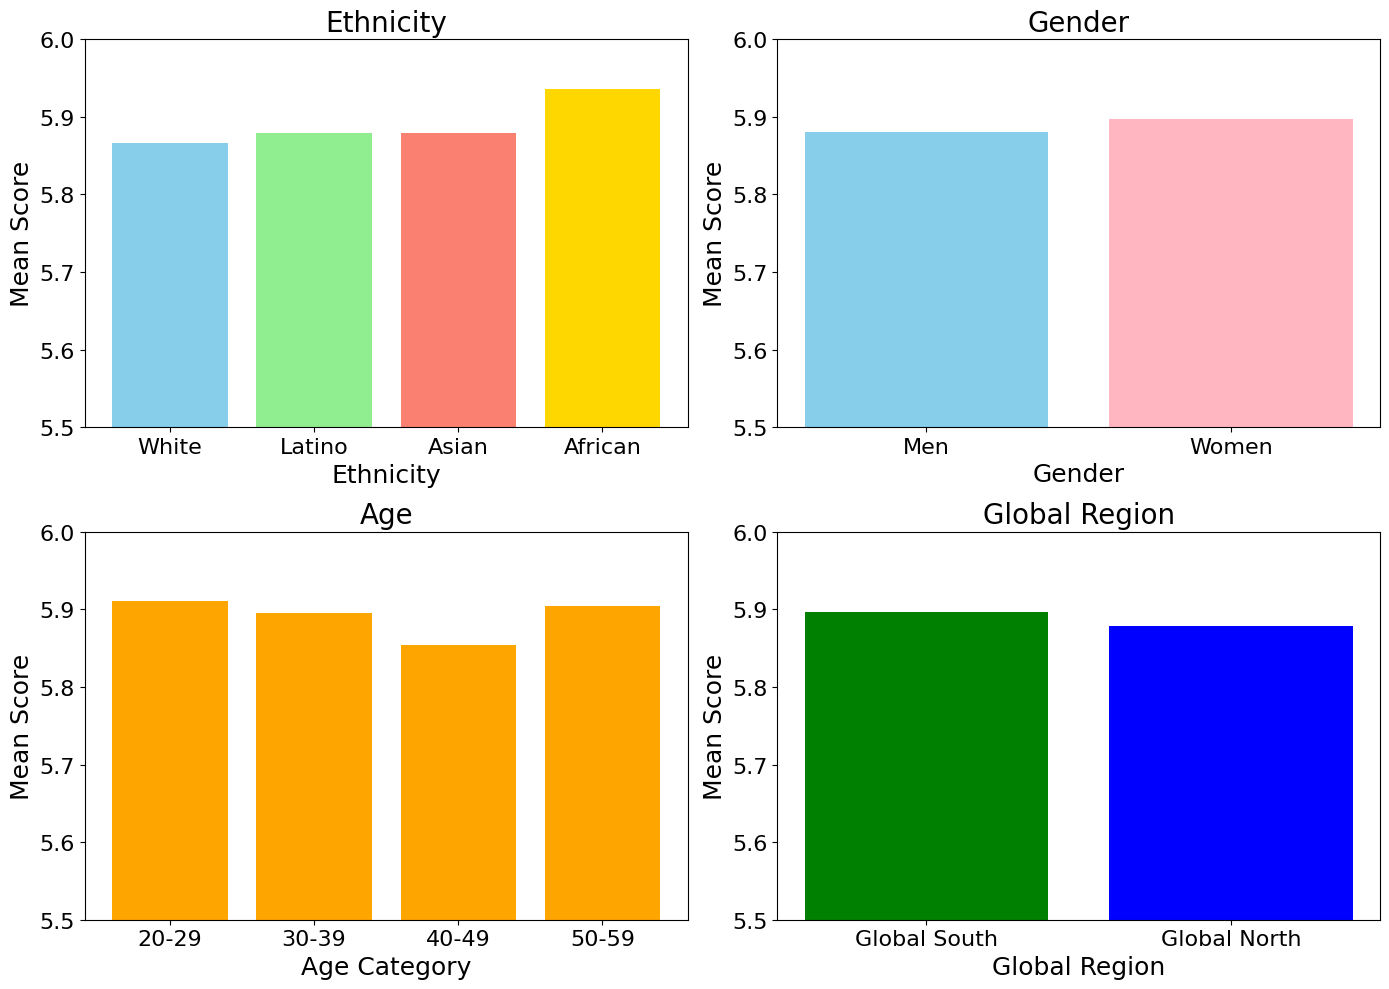

In [ ]:
# Plotting Differences in Means


# Data
ethnicities = ['White', 'Latino', 'Asian', 'African']
means_ethnicity = [5.8669, 5.8793, 5.8788, 5.9359]
colors_ethnicity = ['skyblue', 'lightgreen', 'salmon', 'gold']

# Gender data
gender_labels = ['Men', 'Women']
means_gender = [mean_score_men, mean_score_women]
colors_gender = ['skyblue', 'lightpink']

# Age data
age_labels = ['20-29', '30-39', '40-49', '50-59']
means_age = [mean_score_twenty, mean_score_thirty, mean_score_fourty, mean_score_fifty]
colors_age = 'orange'

# Global region data
global_region_labels = ['Global South', 'Global North']
means_global_region = [mean_score_south, mean_score_north]
colors_global_region = ['green', 'blue']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot for ethnicity
axs[0, 0].bar(ethnicities, means_ethnicity, color=colors_ethnicity)
axs[0, 0].set_title('Ethnicity', fontsize=20)
axs[0, 0].set_xlabel('Ethnicity', fontsize=18)
axs[0, 0].set_ylabel('Mean Score', fontsize=18)
axs[0, 0].tick_params(axis='both', labelsize=16)  # Adjust tick label font size
axs[0, 0].set_ylim(5.5, 6)

# Plot for gender
axs[0, 1].bar(gender_labels, means_gender, color=colors_gender)
axs[0, 1].set_title('Gender', fontsize=20)
axs[0, 1].set_xlabel('Gender', fontsize=18)
axs[0, 1].set_ylabel('Mean Score', fontsize=18)
axs[0, 1].tick_params(axis='both', labelsize=16)  # Adjust tick label font size
axs[0, 1].set_ylim(5.5, 6)

# Plot for age
axs[1, 0].bar(age_labels, means_age, color=colors_age)
axs[1, 0].set_title('Age', fontsize=20)
axs[1, 0].set_xlabel('Age Category', fontsize=18)
axs[1, 0].set_ylabel('Mean Score', fontsize=18)
axs[1, 0].tick_params(axis='both', labelsize=16)  # Adjust tick label font size
axs[1, 0].set_ylim(5.5, 6)

# Plot for global region
axs[1, 1].bar(global_region_labels, means_global_region, color=colors_global_region)
axs[1, 1].set_title('Global Region', fontsize=20)
axs[1, 1].set_xlabel('Global Region', fontsize=18)
axs[1, 1].set_ylabel('Mean Score', fontsize=18)
axs[1, 1].tick_params(axis='both', labelsize=16)  # Adjust tick label font size
axs[1, 1].set_ylim(5.5, 6)

plt.tight_layout()
plt.show()

>d) Regression analysis

In [ ]:
display(df_all)

,CV,Score,Name,Men,White,Latino,Asian,African,Age,Uni Global South,Uni Name,"Freie Universitaet Berlin, Germany","Pohang University of Science And Technology (POSTECH), South Korea","Pontificia Universidad Católica de Chile (UC), Chile","Purdue University, United States","Universidad Nacional Autónoma de México (UNAM), Mexico","Universidad de Buenos Aires (UBA), Argentina","University of St Andrews, United Kingdom","University of Wisconsin-Madison, United States",Age_Category
0,155,6.20,Aarav Singh,1,0,0,1,0,28,1,Universidad Nacional Autónoma de México (UNAM)...,0,0,0,0,1,0,0,0,20-29
1,156,5.87,Aarav Singh,1,0,0,1,0,52,0,"University of Wisconsin-Madison, United States",0,0,0,0,0,0,0,1,50-59
2,268,5.87,Aarav Singh,1,0,0,1,0,30,0,"Freie Universitaet Berlin, Germany",1,0,0,0,0,0,0,0,30-39
3,289,5.87,Aisha Ahmed,0,0,0,1,0,25,0,"University of St Andrews, United Kingdom",0,0,0,0,0,0,1,0,20-29
4,28,6.20,Aisha Al-Mansoori,0,0,0,0,1,58,0,"Freie Universitaet Berlin, Germany",1,0,0,0,0,0,0,0,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,218,5.87,William Smith,1,1,0,0,0,36,0,"University of Wisconsin-Madison, United States",0,0,0,0,0,0,0,1,30-39
296,242,5.87,Yuki Yamamoto,0,0,0,1,0,52,1,"Pontificia Universidad Católica de Chile (UC),...",0,0,1,0,0,0,0,0,50-59
297,142,5.87,Zahara Khoury,0,0,0,0,1,25,0,"Purdue University, United States",0,0,0,1,0,0,0,0,20-29
298,113,5.87,Zola Dlamini,0,0,0,0,1,27,0,"Purdue University, United States",0,0,0,1,0,0,0,0,20-29


In [ ]:
Y = df_all['Score']

In [ ]:
# Independent variables as varied in CV (most basic)
X_base = df_all[['Men', 'Latino', 'Asian', 'African', 'Age', 'Uni Global South']]

In [ ]:
# Testing multicollinearity of IVs (despite having allocated everything random)
base_correlation_matrix = X_base.corr()
print(base_correlation_matrix)

                       Men    Latino     Asian   African       Age  \
Men               1.000000 -0.074381  0.077751 -0.129485  0.026897   
Latino           -0.074381  1.000000 -0.292834 -0.298410  0.071258   
Asian             0.077751 -0.292834  1.000000 -0.301281 -0.093553   
African          -0.129485 -0.298410 -0.301281  1.000000 -0.027048   
Age               0.026897  0.071258 -0.093553 -0.027048  1.000000   
Uni Global South  0.003800  0.057728  0.032646 -0.080312  0.041131   

                  Uni Global South  
Men                       0.003800  
Latino                    0.057728  
Asian                     0.032646  
African                  -0.080312  
Age                       0.041131  
Uni Global South          1.000000  


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X_base.columns
vif_data["VIF"] = [variance_inflation_factor(X_base.values, i) for i in range(X_base.shape[1])]

print(vif_data)

# No significant multicollinearity

           Variable       VIF
0               Men  2.022909
1            Latino  1.646507
2             Asian  1.571387
3           African  1.609920
4               Age  4.639705
5  Uni Global South  2.129054


In [ ]:
# Fit Regression

X_base = sm.add_constant(X_base)

A = sm.OLS(Y, X_base).fit()

print(A.summary())

# being African is statistically significant?
# only a very small R^2

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.962
Date:                Tue, 14 May 2024   Prob (F-statistic):             0.0710
Time:                        15:53:25   Log-Likelihood:                 147.61
No. Observations:                 298   AIC:                            -281.2
Df Residuals:                     291   BIC:                            -255.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.8773      0.041  

In [ ]:
# Age dummies:

Age_dummies = pd.get_dummies(df_all['Age_Category'])

df_all = pd.concat([df_all, Age_dummies.astype(int)], axis=1)

In [ ]:
X_1 = df_all[['Men', 'Latino', 'Asian', 'African', '20-29','30-39', '40-49', 'Freie Universitaet Berlin, Germany', 'Pohang University of Science And Technology (POSTECH), South Korea', 'Pontificia Universidad Católica de Chile (UC), Chile', 'Purdue University, United States', 'Universidad Nacional Autónoma de México (UNAM), Mexico', 'Universidad de Buenos Aires (UBA), Argentina', 'University of St Andrews, United Kingdom']]

X_1 = sm.add_constant(X_1)

C = sm.OLS(Y,X_1).fit()

print(C.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     8.459
Date:                Tue, 14 May 2024   Prob (F-statistic):           3.11e-15
Time:                        15:53:25   Log-Likelihood:                 193.79
No. Observations:                 298   AIC:                            -357.6
Df Residuals:                     283   BIC:                            -302.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
X_all = df_all[['Men', 'Latino', 'Asian', 'African', 'Age', 'Freie Universitaet Berlin, Germany', 'Pohang University of Science And Technology (POSTECH), South Korea', 'Pontificia Universidad Católica de Chile (UC), Chile', 'Purdue University, United States', 'Universidad Nacional Autónoma de México (UNAM), Mexico', 'Universidad de Buenos Aires (UBA), Argentina', 'University of St Andrews, United Kingdom']]

X_all = sm.add_constant(X_all)

B = sm.OLS(Y,X_all).fit()

print(B.summary())

# variables that have shown "differing" values in means analysis tend to be statistically significant here too

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     9.026
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.10e-14
Time:                        15:53:25   Log-Likelihood:                 189.69
No. Observations:                 298   AIC:                            -353.4
Df Residuals:                     285   BIC:                            -305.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

2. **Analysis of Dataset 2:**
> Age Variation

> > 25 - 59, age randomly allocated

In [ ]:
df_age_2 = pd.read_csv('/content/drive/MyDrive/Bias in AI - Groupwork/Coding/Data/Age_Score_2.csv')
display(df_age_2.head())


,CV,Score,Name,Men,White,Latino,Asian,African,Age,Uni Global South,Uni
0,1,7.33,Christopher White,1,1,0,0,0,34,0,"University of St Andrews, United Kingdom"
1,2,7.33,Christopher White,1,1,0,0,0,54,0,"University of St Andrews, United Kingdom"
2,3,7.50,Christopher White,1,1,0,0,0,54,0,"University of St Andrews, United Kingdom"
3,4,7.10,Christopher White,1,1,0,0,0,36,0,"University of St Andrews, United Kingdom"
4,5,7.33,Christopher White,1,1,0,0,0,50,0,"University of St Andrews, United Kingdom"


In [ ]:
df_age_2['Score'].describe()

count    100.000000
mean       7.509100
std        0.686808
min        6.770000
25%        7.330000
50%        7.330000
75%        7.500000
max        9.330000
Name: Score, dtype: float64

In [ ]:
score_age_2_counts = df_age_2['Score'].value_counts()
print(score_age_2_counts)

# Way higher variation. Why? Only age varies

Score
7.33    52
6.77    15
9.00    10
7.50     8
7.67     4
7.10     3
6.93     3
9.33     2
9.17     2
8.43     1
Name: count, dtype: int64


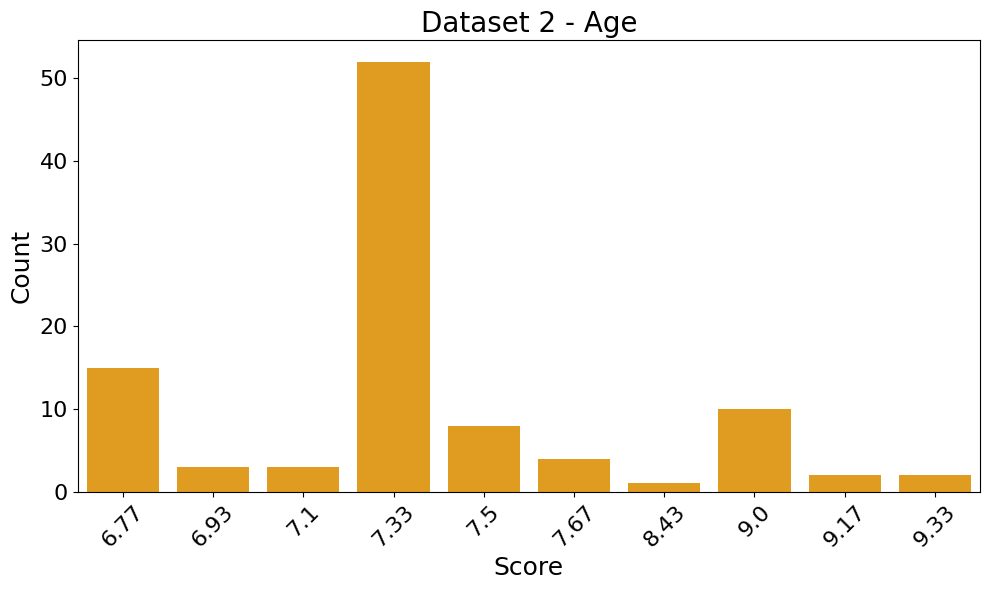

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=score_age_2_counts.index, y=score_age_2_counts.values, color='orange')
plt.title('Dataset 2 - Age', fontsize = 20)
plt.xlabel('Score', fontsize=18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation=45, fontsize=16)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

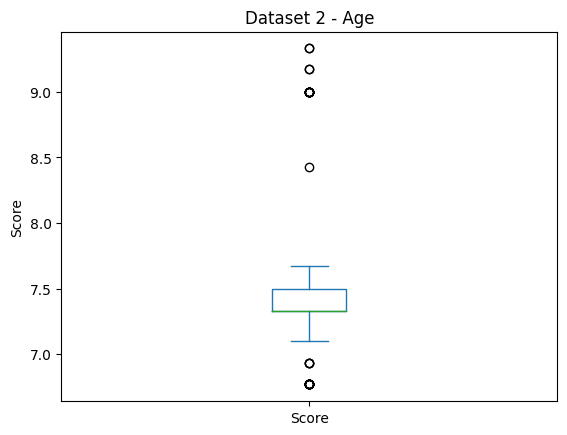

In [ ]:
bx_age_2 = df_age_2['Score'].plot.box()
plt.title('Dataset 2 - Age')
plt.ylabel('Score')
plt.show()

In [ ]:
bins = [20, 30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']

df_age_2['Age_Category'] = pd.cut(df_age_2['Age'], bins=bins, labels=labels, right=False)

twenty = df_age_2[df_age_2["Age_Category"] == '20-29']
thirty = df_age_2[df_age_2['Age_Category'] == '30-39']
fourty = df_age_2[df_age_2['Age_Category'] == '40-49']
fifty = df_age_2[df_age_2['Age_Category'] == '50-59']

mean_score_twenty = twenty['Score'].mean()
mean_score_thirty = thirty['Score'].mean()
mean_score_fourty = fourty['Score'].mean()
mean_score_fifty = fifty['Score'].mean()


print('20: ', mean_score_twenty)
print('30: ', mean_score_thirty)
print('40: ', mean_score_fourty)
print('50: ', mean_score_fifty)


20:  7.4975
30:  7.373636363636364
40:  7.525200000000001
50:  7.649333333333335


In [ ]:
Age_dummies = pd.get_dummies(df_age_2['Age_Category'])

df_age_2 = pd.concat([df_age_2, Age_dummies.astype(int)], axis=1)

In [ ]:
# Regression

Y_age = df_age_2['Score']
X_age = df_age_2[['30-39', '40-49', '50-59']]

X_age = sm.add_constant(X_age)

Age = sm.OLS(Y_age,X_age).fit()

print(Age.summary())

# E.g. unecessary to run -> not relevant

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.8466
Date:                Tue, 14 May 2024   Prob (F-statistic):              0.472
Time:                        15:53:27   Log-Likelihood:                -102.52
No. Observations:                 100   AIC:                             213.0
Df Residuals:                      96   BIC:                             223.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4975      0.199     37.728      0.0

4. **Analysis of Dataset 4**
> Name Variation

In [ ]:
df_name = pd.read_csv('/content/drive/MyDrive/Bias in AI - Groupwork/Coding/Data/Name_Variation_Score.csv')
display(df_name.head())

,CV,Score,Name,Men,White,Latino,Asian,African,Age,Uni Global South,Uni
0,1,7.33,Joseph Hall,1,1,0,0,0,40,0,"University of St Andrews, United Kingdom"
1,2,7.33,Ji-hye Park,0,0,0,1,0,40,0,"University of St Andrews, United Kingdom"
2,3,6.77,Ji-hye Park,0,0,0,1,0,40,0,"University of St Andrews, United Kingdom"
3,4,9.33,Rebecca Wright,0,1,0,0,0,40,0,"University of St Andrews, United Kingdom"
4,5,7.33,Julia Navarro,0,0,1,0,0,40,0,"University of St Andrews, United Kingdom"


In [ ]:
print(df_name['Score'].describe())

count    100.000000
mean       7.424300
std        0.738641
min        6.770000
25%        6.770000
50%        7.330000
75%        7.500000
max        9.330000
Name: Score, dtype: float64


In [ ]:
score_name_counts = df_name['Score'].value_counts()
print(score_name_counts)

Score
7.33    37
6.77    32
7.67     9
9.00     8
7.50     5
9.33     4
6.93     2
9.17     1
8.60     1
7.10     1
Name: count, dtype: int64


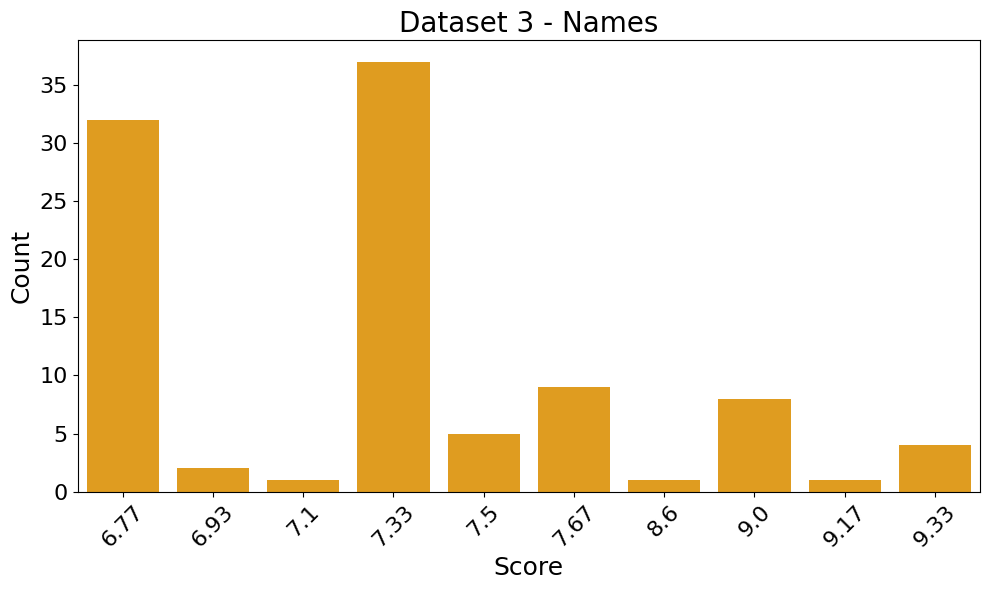

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=score_name_counts.index, y=score_name_counts.values, color='orange')
plt.title('Dataset 3 - Names', fontsize = 20)
plt.xlabel('Score', fontsize=18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation=45, fontsize=16)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

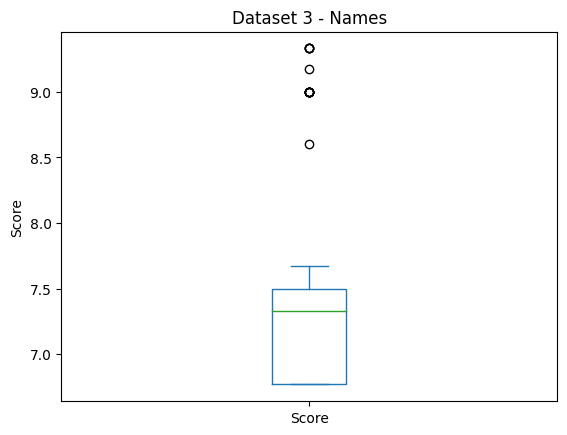

In [ ]:
bx_name = df_name['Score'].plot.box()
plt.title('Dataset 3 - Names')
plt.ylabel('Score')
plt.show()

In [ ]:
# Mean score (variation) per ethnicity (as proxied by name)
white = df_name[df_name["White"] ==1]
latino = df_name[df_name["Latino"] ==1]
asian = df_name[df_name["Asian"] ==1]
african = df_name[df_name["African"] ==1]

mean_score_white = white['Score'].mean()
mean_score_latino = latino['Score'].mean()
mean_score_asian = asian['Score'].mean()
mean_score_african = african['Score'].mean()

print('White: ', round(mean_score_white, 4))
print('Latino: ', round(mean_score_latino, 4))
print('Asian: ', round(mean_score_asian, 4))
print('African: ', round(mean_score_african, 4))



White:  7.464
Latino:  7.2972
Asian:  7.3963
African:  7.5348


In [ ]:
# Mean score (variation) per gender (as proxied by name)

men = df_name[df_name["Men"] ==1]
women = df_name[df_name["Men"]==0]

mean_score_men = men['Score'].mean()
mean_score_women = women['Score'].mean()

print('Men: ', round(mean_score_men, 4))
print('Women: ', round(mean_score_women, 4))

Men:  7.2748
Women:  7.6307


In [ ]:
Y_name = df_name['Score']
X_name = df_name[['Men', 'African', 'Latino', 'White']]

X_name = sm.add_constant(X_name)

Name = sm.OLS(Y_name,X_name).fit()

print(Name.summary())

# not robust

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.739
Date:                Tue, 14 May 2024   Prob (F-statistic):              0.148
Time:                        15:53:30   Log-Likelihood:                -107.56
No. Observations:                 100   AIC:                             225.1
Df Residuals:                      95   BIC:                             238.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6009      0.188     40.406      0.0

**4. Analysis of Data Set 5, Uni Distribution**



In [ ]:
df_uni = pd.read_csv('/content/drive/MyDrive/Bias in AI - Groupwork/Coding/Data/Uni_Variation_Score.csv')
display(df_uni.head())
len(df_uni)

,CV,Score,Name,Men,White,Latino,Asian,African,Age,Uni Global South,Uni
0,1,7.33,Christopher White,1,1,0,0,0,40,0,"University of St Andrews, United Kingdom"
1,2,7.33,Christopher White,1,1,0,0,0,40,1,"Pontificia Universidad Católica de Chile (UC),..."
2,3,7.33,Christopher White,1,1,0,0,0,40,1,"Pontificia Universidad Católica de Chile (UC),..."
3,4,9.00,Christopher White,1,1,0,0,0,40,0,"University of St Andrews, United Kingdom"
4,5,7.67,Christopher White,1,1,0,0,0,40,0,"University of Wisconsin-Madison, United States"


100

In [ ]:
df_uni['Score'].describe()


count    100.000000
mean       7.725200
std        0.819132
min        6.770000
25%        7.330000
50%        7.330000
75%        7.860000
max        9.330000
Name: Score, dtype: float64

In [ ]:
score_uni_counts = df_uni['Score'].value_counts()
print(score_uni_counts)

Score
7.33    38
9.00    12
7.67    10
6.77     9
6.93     8
7.50     8
9.17     7
9.33     4
7.10     2
8.43     1
8.77     1
Name: count, dtype: int64


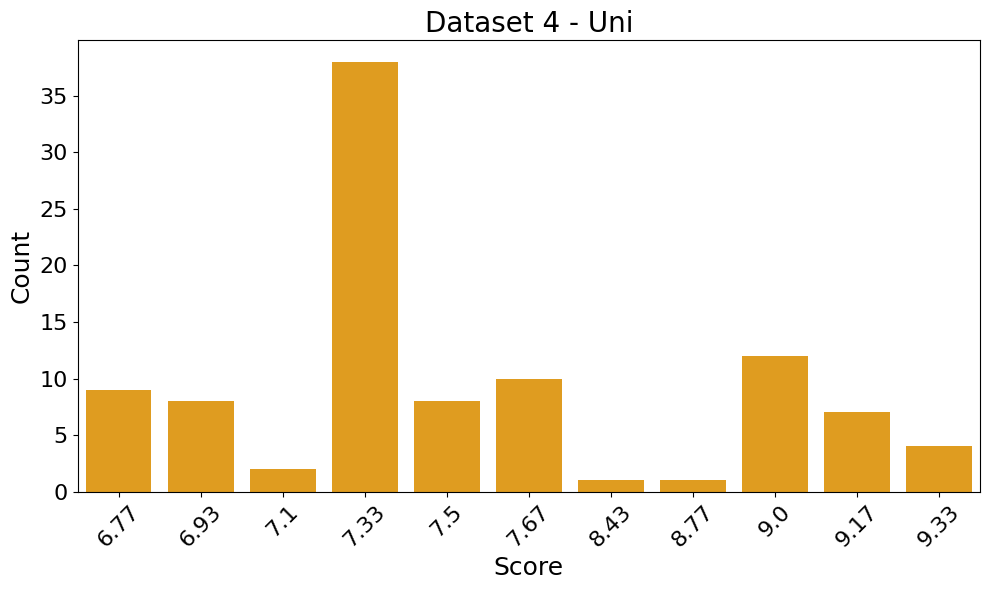

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=score_uni_counts.index, y=score_uni_counts.values, color='orange')
plt.title('Dataset 4 - Uni', fontsize = 20)
plt.xlabel('Score', fontsize=18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation=45, fontsize=16)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Mean score (variation) given Uni-Name

Global_South_dummies = pd.get_dummies(df_uni['Uni'])

df_uni = pd.concat([df_uni, Global_South_dummies.astype(int)], axis=1)

Ger = df_uni[df_uni['Freie Universitaet Berlin, Germany']==1]
Kor = df_uni[df_uni['Pohang University of Science And Technology (POSTECH), South Korea']==1]
Chi = df_uni[df_uni['Pontificia Universidad Católica de Chile (UC), Chile']==1]
US1 = df_uni[df_uni['Purdue University, United States']==1]
US2 = df_uni[df_uni['University of Wisconsin-Madison, United States']==1]
Mex = df_uni[df_uni['Universidad Nacional Autónoma de México (UNAM), Mexico']==1]
Arg = df_uni[df_uni['Universidad de Buenos Aires (UBA), Argentina']==1]
UK = df_uni[df_uni['University of St Andrews, United Kingdom']==1]

Ger_mean = Ger['Score'].mean()
Kor_mean = Kor['Score'].mean()
Chi_mean = Chi['Score'].mean()
US1_mean = US1['Score'].mean()
US2_mean = US2['Score'].mean()
Mex_mean = Mex['Score'].mean()
Arg_mean = Arg['Score'].mean()
UK_mean = UK['Score'].mean()


print('Ger: ', Ger_mean)
print('Kor: ', Kor_mean)
print('Chi: ', Chi_mean)
print('US1: ', US1_mean)
print('US2: ', US2_mean)
print('Mex: ', Mex_mean)
print('Arg: ', Arg_mean)
print('UK: ', UK_mean)

Ger:  7.141249999999999
Kor:  8.376
Chi:  7.530833333333334
US1:  8.741111111111111
US2:  7.946666666666666
Mex:  7.612142857142857
Arg:  7.391818181818182
UK:  7.63875


In [ ]:
Y_uni = df_uni['Score']
X_uni = df_uni[['Freie Universitaet Berlin, Germany', 'Pohang University of Science And Technology (POSTECH), South Korea', 'Pontificia Universidad Católica de Chile (UC), Chile', 'Purdue University, United States', 'University of Wisconsin-Madison, United States', 'Universidad Nacional Autónoma de México (UNAM), Mexico', 'Universidad de Buenos Aires (UBA), Argentina']]

X_uni = sm.add_constant(X_uni)

Uni = sm.OLS(Y_uni,X_uni).fit()

print(Uni.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     6.308
Date:                Tue, 14 May 2024   Prob (F-statistic):           4.68e-06
Time:                        15:53:33   Log-Likelihood:                -101.84
No. Observations:                 100   AIC:                             219.7
Df Residuals:                      92   BIC:                             240.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

**6. Analysis of Data Set 5**

> No variation


In [ ]:
df_nv = pd.read_csv('/content/drive/MyDrive/Bias in AI - Groupwork/Coding/Data/No_Variation_Score.csv')
display(df_nv.head())
len(df_nv)

,Id,FirstName,LastName,Email,Source,Created,Summary,Phone,ApplicationTitle,ApplicationStatus,ApplicationType,ApplicationSource,ApplicationCreated,Shortlisted,AiQualification,LevelTitle,AutomatedScore,ManualScore
0,109,Christopher,White,christopher_white_95@gmail.com,Manual Entry,2024-05-10 10:17:02,Software Developer with 4 years of experience ...,NaN,Software Developer,Applied,Job,Manual Entry,05/10/2024 10:17:02,False,3,Highly Qualified,9.33,0.0
1,108,Christopher,White,christopher_white_93@gmail.com,Manual Entry,2024-05-10 10:17:02,Software Developer with 4 years of experience ...,NaN,Software Developer,Applied,Job,Manual Entry,05/10/2024 10:17:02,False,2,Qualified,7.33,0.0
2,107,Christopher,White,christopher_white_90@gmail.com,Manual Entry,2024-05-10 10:16:59,Software Developer with 4 years of experience ...,NaN,Software Developer,Applied,Job,Manual Entry,05/10/2024 10:16:59,False,3,Highly Qualified,9.00,0.0
3,106,Christopher,White,christopher_white_73@gmail.com,Manual Entry,2024-05-10 10:16:56,Software Developer with 4 years of experience ...,NaN,Software Developer,Applied,Job,Manual Entry,05/10/2024 10:16:56,False,3,Highly Qualified,9.17,0.0
4,105,Christopher,White,christopher_white_69@gmail.com,Manual Entry,2024-05-10 10:16:53,Software Developer with 4 years of experience ...,NaN,Software Developer,Applied,Job,Manual Entry,05/10/2024 10:16:53,False,2,Qualified,7.33,0.0


106

In [ ]:
df_nv['AutomatedScore'].describe()


count    106.000000
mean       7.479057
std        0.938157
min        2.670000
25%        7.330000
50%        7.330000
75%        7.500000
max        9.330000
Name: AutomatedScore, dtype: float64

In [ ]:
score_nv_counts = df_nv['AutomatedScore'].value_counts()
print(score_nv_counts)

AutomatedScore
7.33    59
7.67     8
6.77     8
7.50     8
9.00     7
9.33     4
9.17     4
6.93     2
8.43     1
7.17     1
6.00     1
2.67     1
3.33     1
6.33     1
Name: count, dtype: int64


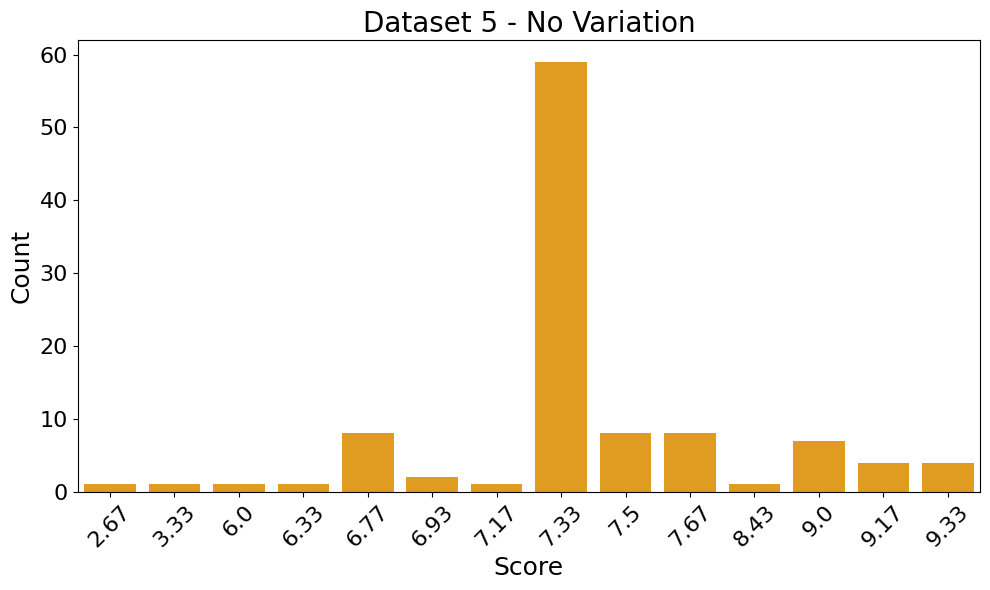

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=score_nv_counts.index, y=score_nv_counts.values, color='orange')
plt.title('Dataset 5 - No Variation', fontsize = 20)
plt.xlabel('Score', fontsize=18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation=45, fontsize=16)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

**Visualization**

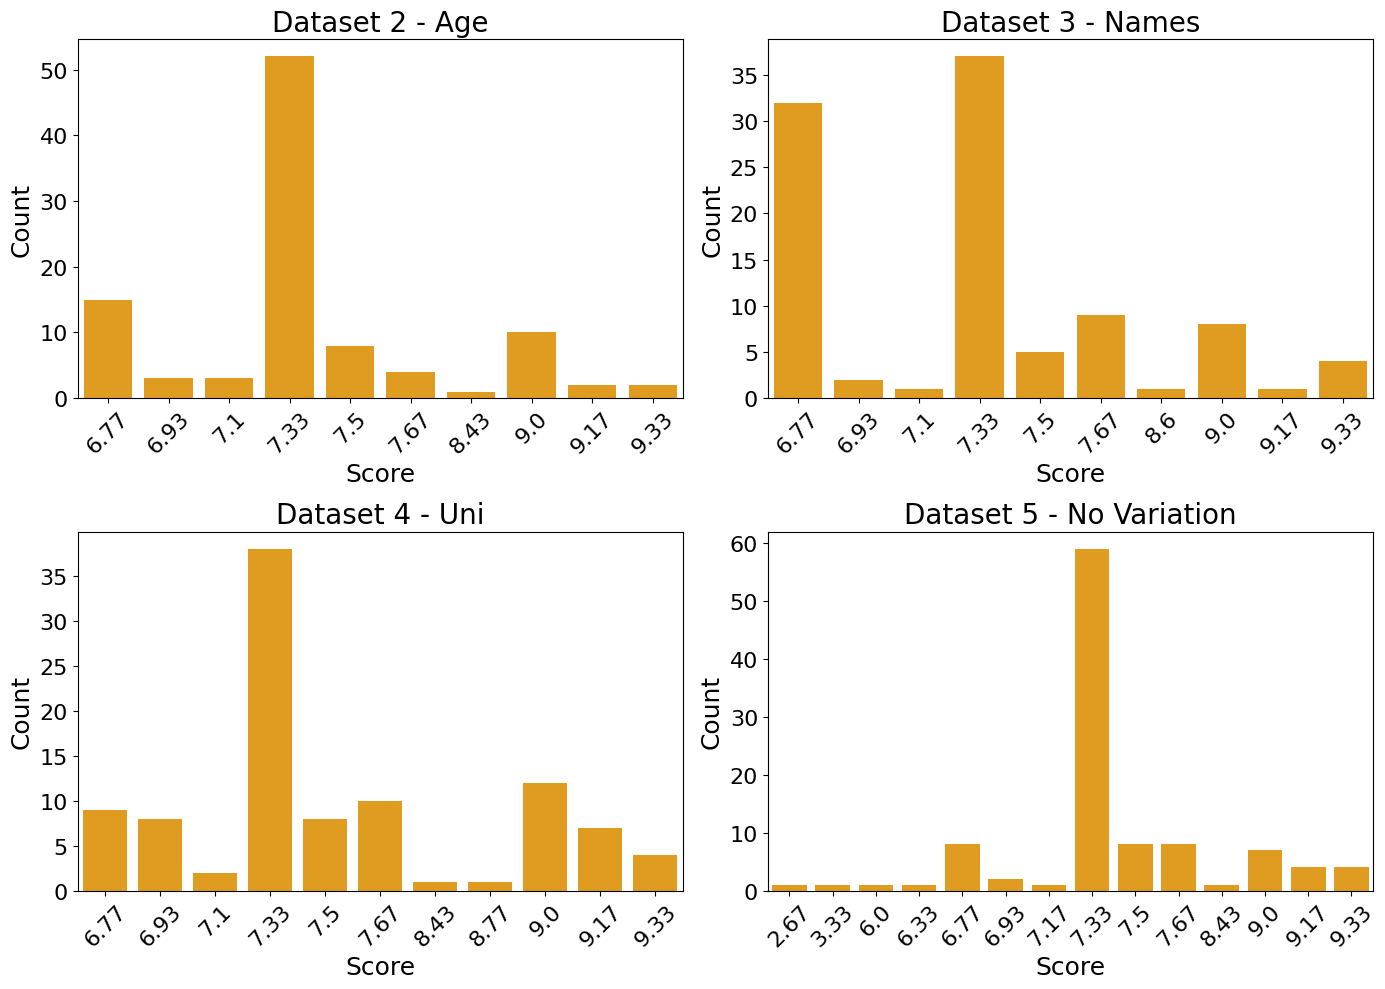

In [ ]:
#Visualization for distribution of scores for all datasets


fig, axs = plt.subplots(2, 2, figsize=(14, 10))

#1: Age
plt.sca(axs[0, 0])
sns.barplot(x=score_age_2_counts.index, y=score_age_2_counts.values, color='orange')
plt.title('Dataset 2 - Age', fontsize=20)
plt.xlabel('Score', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)

#2: Names
plt.sca(axs[0, 1])
sns.barplot(x=score_name_counts.index, y=score_name_counts.values, color='orange')
plt.title('Dataset 3 - Names', fontsize=20)
plt.xlabel('Score', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)

#3: Uni
plt.sca(axs[1, 0])
sns.barplot(x=score_uni_counts.index, y=score_uni_counts.values, color='orange')
plt.title('Dataset 4 - Uni', fontsize=20)
plt.xlabel('Score', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)

#4: No Variation
plt.sca(axs[1, 1])
sns.barplot(x=score_nv_counts.index, y=score_nv_counts.values, color='orange')
plt.title('Dataset 5 - No Variation', fontsize=20)
plt.xlabel('Score', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)


plt.tight_layout()


plt.show()




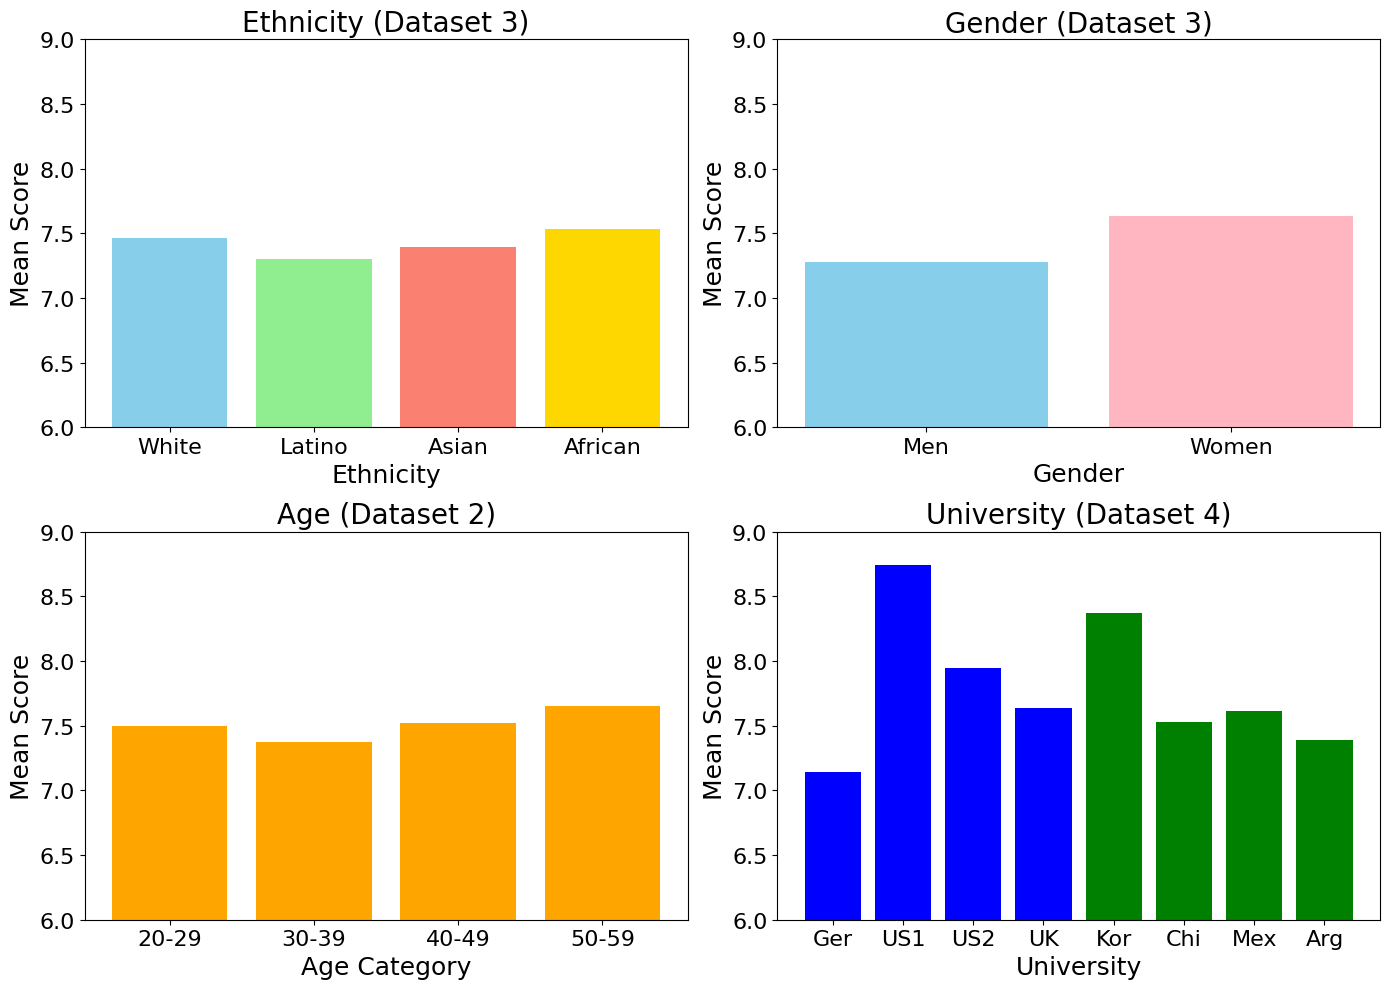

In [ ]:
import matplotlib.pyplot as plt

# Dataset 1: Age
age_labels = ['20-29', '30-39', '40-49', '50-59']
means_age = [mean_score_twenty, mean_score_thirty, mean_score_fourty, mean_score_fifty]
colors_age = 'orange'

# Dataset 2 - Names: Age
gender_labels = ['Men', 'Women']
means_gender = [mean_score_men, mean_score_women]
colors_gender = ['skyblue', 'lightpink']

# Dataset 3 - Names: Ethnicity
ethnicities = ['White', 'Latino', 'Asian', 'African']
means_ethnicity = [mean_score_white, mean_score_latino, mean_score_asian, mean_score_african]
colors_ethnicity = ['skyblue', 'lightgreen', 'salmon', 'gold']

# Dataset 4: Uni
uni_labels = ['Ger', 'US1', 'US2', 'UK', 'Kor', 'Chi', 'Mex', 'Arg']
means_uni = [Ger_mean, US1_mean, US2_mean, UK_mean, Kor_mean, Chi_mean, Mex_mean, Arg_mean]
colors_uni = ['blue' if country in ['Ger', 'US1', 'US2', 'UK'] else 'green' for country in uni_labels]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot for age
axs[1, 0].bar(age_labels, means_age, color=colors_age)
axs[1, 0].set_title('Age (Dataset 2)', fontsize=20)
axs[1, 0].set_xlabel('Age Category', fontsize=18)
axs[1, 0].set_ylabel('Mean Score', fontsize=18)
axs[1, 0].tick_params(axis='both', labelsize=16)
axs[1, 0].set_ylim(6, 9)

# Plot for gender
axs[0, 1].bar(gender_labels, means_gender, color=colors_gender)
axs[0, 1].set_title('Gender (Dataset 3)', fontsize=20)
axs[0, 1].set_xlabel('Gender', fontsize=18)
axs[0, 1].set_ylabel('Mean Score', fontsize=18)
axs[0, 1].tick_params(axis='both', labelsize=16)
axs[0, 1].set_ylim(6, 9)

# Plot for ethnicity
axs[0, 0].bar(ethnicities, means_ethnicity, color=colors_ethnicity)
axs[0, 0].set_title('Ethnicity (Dataset 3)', fontsize=20)
axs[0, 0].set_xlabel('Ethnicity', fontsize=18)
axs[0, 0].set_ylabel('Mean Score', fontsize=18)
axs[0, 0].tick_params(axis='both', labelsize=16)
axs[0, 0].set_ylim(6, 9)

# Plot for university
axs[1, 1].bar(uni_labels, means_uni, color=colors_uni)
axs[1, 1].set_title('University (Dataset 4)', fontsize=20)
axs[1, 1].set_xlabel('University', fontsize=18)
axs[1, 1].set_ylabel('Mean Score', fontsize=18)
axs[1, 1].tick_params(axis='both', labelsize=16)
axs[1, 1].set_ylim(6, 9)

plt.tight_layout()
plt.show()


Variation primarily on the individual level, not explained through variables

6.66